In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

sklearn.__version__

'1.2.2'

In [2]:
x = pd.read_csv("dataset/diabetes.csv")
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
from sklearn.model_selection import train_test_split

x_temp = x
x_temp.iloc[:,:-1] = x_temp.iloc[:,:-1].replace({0:1e-5})

In [4]:
x_temp["Blood pressure per ages"] = x_temp["BloodPressure"] / x_temp["Age"]
x_temp.corr()["Outcome"]
x_temp["Age_cat"] = pd.cut(x_temp["Age"], bins = [20, 30, 40, 50, 60, 70, np.inf], labels = [1, 2, 3, 4, 5, 6])
x_temp["Glucose_cat"] = pd.cut(x_temp["Glucose"], bins = [0, 60, 75, 90, 105, 120, 135, 150, 165, 180, np.inf], labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
x_temp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Blood pressure per ages,Age_cat,Glucose_cat
0,6.00000,148.0,72.0,35.00000,0.00001,33.6,0.627,50,1,1.440000,3,7
1,1.00000,85.0,66.0,29.00000,0.00001,26.6,0.351,31,0,2.129032,2,3
2,8.00000,183.0,64.0,0.00001,0.00001,23.3,0.672,32,1,2.000000,2,10
3,1.00000,89.0,66.0,23.00000,94.00000,28.1,0.167,21,0,3.142857,1,3
4,0.00001,137.0,40.0,35.00000,168.00000,43.1,2.288,33,1,1.212121,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.00000,101.0,76.0,48.00000,180.00000,32.9,0.171,63,0,1.206349,5,4
764,2.00000,122.0,70.0,27.00000,0.00001,36.8,0.340,27,0,2.592593,1,6
765,5.00000,121.0,72.0,23.00000,112.00000,26.2,0.245,30,0,2.400000,1,6
766,1.00000,126.0,60.0,0.00001,0.00001,30.1,0.349,47,1,1.276596,3,6


In [5]:
train_set, test_set = train_test_split(x_temp, test_size = 0.2, stratify = x_temp.loc[:,"Glucose_cat"], random_state = 42)
x_train, y_train, x_test, y_test = train_set.drop(["Outcome", "Age"], axis = 1), train_set["Outcome"], test_set.drop(["Outcome", "Age"], axis = 1), test_set["Outcome"]

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

log_cat = ["Pregnancies", "SkinThickness", "Insulin", "DiabetesPedigreeFunction"]
num_cat = ["Glucose", "BloodPressure", "BMI", "Blood pressure per ages"]

num_pipeline = make_pipeline(StandardScaler())
log_pipeline = make_pipeline(FunctionTransformer(np.log, feature_names_out = "one-to-one"), StandardScaler())

preprocessing = ColumnTransformer([("log", log_pipeline, log_cat),
                                  ("num", num_pipeline, num_cat)])

svm_clf = make_pipeline(preprocessing, SVC(kernel = "rbf", random_state = 42))
linSVM_clf = make_pipeline(preprocessing, LinearSVC(C = 1000, random_state = 42, dual = False))

In [7]:
linSVM_clf.fit(x_train, y_train)
svm_clf.fit(x_train, y_train)

linSVM_clf.named_steps

{'columntransformer': ColumnTransformer(transformers=[('log',
                                  Pipeline(steps=[('functiontransformer',
                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                       func=<ufunc 'log'>)),
                                                  ('standardscaler',
                                                   StandardScaler())]),
                                  ['Pregnancies', 'SkinThickness', 'Insulin',
                                   'DiabetesPedigreeFunction']),
                                 ('num',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  ['Glucose', 'BloodPressure', 'BMI',
                                   'Blood pressure per ages'])]),
 'linearsvc': LinearSVC(C=1000, dual=False, random_state=42)}

In [8]:
lin_predicts = linSVM_clf.predict(x_train)
lin_acc = lin_predicts == y_train

svm_predicts = svm_clf.predict(x_train)
svm_acc = svm_predicts == y_train

0.8034682080924855 0.7191011235955056
0.6289592760180995 0.7191011235955056


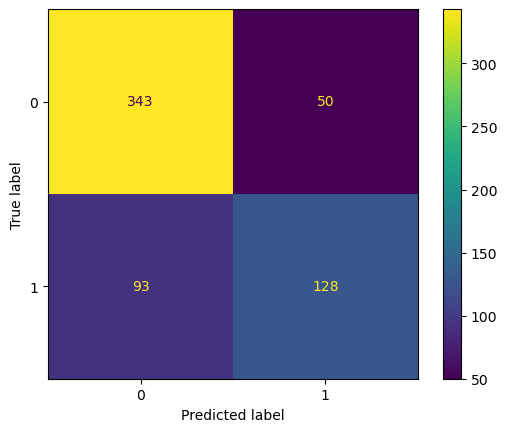

In [9]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

print(precision_score(y_train, svm_predicts), precision_score(y_train, lin_predicts))
print(recall_score(y_train, svm_predicts), precision_score(y_train, lin_predicts))
ConfusionMatrixDisplay.from_predictions(y_train, lin_predicts)

(-50.0, 50.0, 0.0, 1.0)

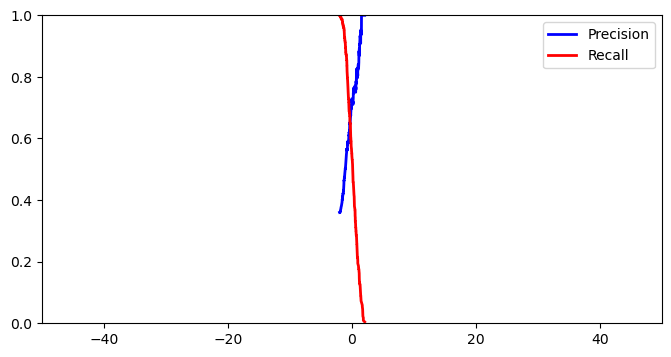

In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

svm_scores = cross_val_predict(svm_clf, x_train, y_train, cv = 5, method = "decision_function")

plt.figure(figsize = (8, 4))
precision, recalls, thresholds = precision_recall_curve(y_train, svm_scores)
plt.plot(thresholds, precision[:-1], "b-", label = "Precision", linewidth = 2)
plt.plot(thresholds, recalls[:-1], "r-", label = "Recall", linewidth = 2)
plt.legend()
plt.axis([-50, 50, 0, 1])

In [11]:
id = (0.6 >= recalls).argmax()
thresholds[id]

-0.16253445996959384

In [12]:
y_train_pred = svm_scores >= thresholds[id]
precision_score(y_train, y_train_pred)

(y_train == y_train_pred).sum() / len(y_train)

0.755700325732899

In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_clf, x_train, y_train, cv = 5)
scores

array([0.7804878 , 0.7804878 , 0.73170732, 0.7398374 , 0.77868852])

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {"linearsvc__C": randint(low = 0, high = 100000)}

random_search = RandomizedSearchCV(linSVM_clf, param_distributions = param_distribs, n_iter = 10, cv = 3,
                                  scoring = "neg_root_mean_squared_error", random_state = 42)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('log',
                                                                               Pipeline(steps=[('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out='one-to-one',
                                                                                                                    func=<ufunc 'log'>)),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['Pregnancies',
                                                                                'SkinThickness',
                                                                                'Insulin',
                                                                                'DiabetesPedigreeFunction']),
                                                                              ('num',
                                                                               Pipeline(steps=[('standardscaler',
                                                                                                StandardScaler())]),
                                                                               ['Glucose',
                                                                                'BloodPressure',
                                                                                'BMI',
                                                                                'Blood '
                                                                                'pressure '
                                                                                'per '
                                                                                'ages'])])),
                                             ('linearsvc',
                                              LinearSVC(C=1000, dual=False,
                                                        random_state=42))]),
                   param_distributions={'linearsvc__C': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000280B8A39520>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [15]:
linSVM_model = random_search.best_estimator_
linSVM_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies',
                                                   'SkinThickness', 'Insulin',
                                                   'DiabetesPedigreeFunction']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Glucose', 'BloodPressure',
                                                   'BMI',
                                                   'Blood pressure per '
                                                   'ages'])])),
                ('linearsvc', LinearSVC(C=15795, dual=False, random_state=42))])

In [16]:
predicts = svm_clf.predict(x_test)
lin_predicts = linSVM_model.predict(x_test)
acc = predicts == y_test
lin_acc = lin_predicts == y_test
print("SVM: %f%% \nLinear SVM: %f%%" %(acc.sum() * 100 / len(acc), lin_acc.sum() * 100 / len(acc)))

SVM: 79.220779% 
Linear SVM: 77.272727%
